In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load Dataset
file_path = "adult_with_headers.csv"
df = pd.read_csv(file_path)

In [4]:
# Data Exploration
print(df.info())
print('*'*50)
print(df.describe())
print('*'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
**************************************************
                age        fnlwgt  ed

In [5]:
# Check for missing values
print(df.isnull().sum())  

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [6]:
# Scaling Numerical Features
num_features = df.select_dtypes(include=['int64', 'float64']).columns
scaler_standard = StandardScaler()
df[num_features + '_std'] = scaler_standard.fit_transform(df[num_features])

scaler_minmax = MinMaxScaler()
df[num_features + '_minmax'] = scaler_minmax.fit_transform(df[num_features])

In [7]:
# Encoding Categorical Variables
cat_features = df.select_dtypes(include=['object']).columns
for col in cat_features:
    if df[col].nunique() <= 5:
        df = pd.get_dummies(df, columns=[col], drop_first=True)  # One-Hot Encoding
    else:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])  # Label Encoding

In [8]:
# Feature Engineering
# Creating new feature: Age groups
bins = [0, 25, 45, 65, 100]
labels = ['Young', 'Adult', 'Middle-Aged', 'Senior']
df['Age_Group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [10]:
# Creating new feature: Work experience categories
df['Work_Exp_Cat'] = pd.cut(df['hours_per_week'], bins=[0, 20, 40, 60, 100], labels=['Part-time', 'Full-time', 'Overtime', 'Extreme'])

In [12]:
# Apply Log Transformation to skewed numerical feature
skewed_feature = 'capital_gain'
df[skewed_feature + '_log'] = np.log1p(df[skewed_feature])

In [14]:
# Feature Selection using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(df[num_features])
df['Outlier'] = outliers
df = df[df['Outlier'] == 1]  # Removing outliers

df.drop(columns=['Outlier'], inplace=True)

C:\Users\KRISHNA TEJA\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\KRISHNA TEJA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
# Predictive Power Score (PPS) Analysis
pps_matrix = pps.matrix(df)[['x', 'y', 'ppscore']]
pps_pivot = pps_matrix.pivot(index='x', columns='y', values='ppscore')

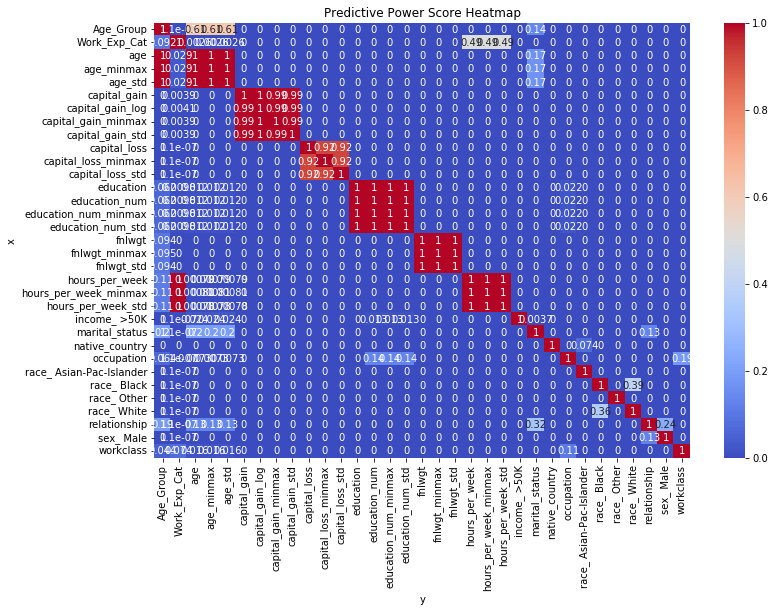

In [16]:
# Display PPS Score Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pps_pivot, cmap='coolwarm', annot=True)
plt.title('Predictive Power Score Heatmap')
plt.show()

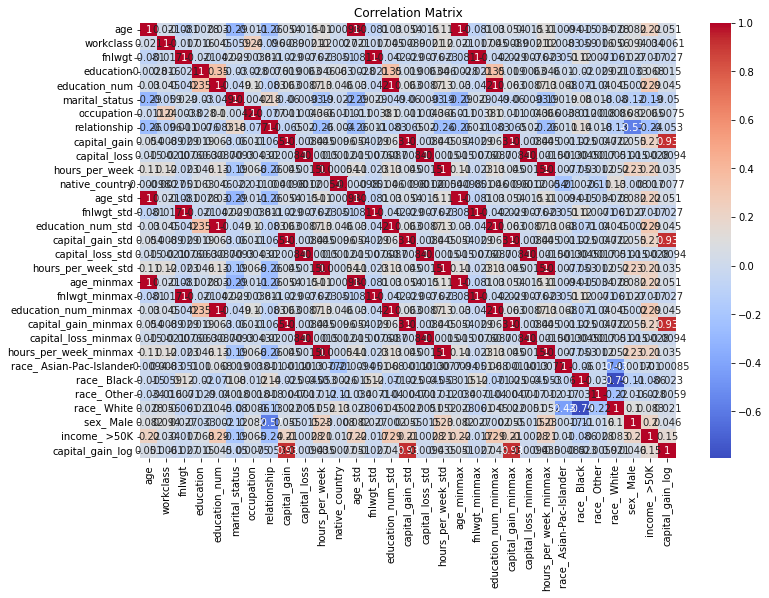

In [17]:
# Display Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()
